In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(
    "train.csv",usecols=["CryoSleep","Cabin","Destination","Transported"]
)

data.head()

,CryoSleep,Cabin,Destination,Transported
0,False,B/0/P,TRAPPIST-1e,False
1,False,F/0/S,TRAPPIST-1e,True
2,False,A/0/S,TRAPPIST-1e,False
3,False,A/0/S,TRAPPIST-1e,False
4,False,F/1/S,TRAPPIST-1e,True


In [3]:
data["Cabin_1"]= data.Cabin.str.split("/",expand=True)[0]
data["Cabin_3"]= data.Cabin.str.split("/",expand=True)[2]
data.drop("Cabin",axis=1,inplace=True)
data["Transported"] = data["Transported"].astype(int)

In [4]:
data = data.dropna()
data.head()

,CryoSleep,Destination,Transported,Cabin_1,Cabin_3
0,False,TRAPPIST-1e,0,B,P
1,False,TRAPPIST-1e,1,F,S
2,False,TRAPPIST-1e,0,A,S
3,False,TRAPPIST-1e,0,A,S
4,False,TRAPPIST-1e,1,F,S


In [5]:
X= data.drop("Transported",axis=1)
y = data["Transported"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3,  
    random_state=20,
)

X_train.shape, X_test.shape

((5676, 4), (2433, 4))

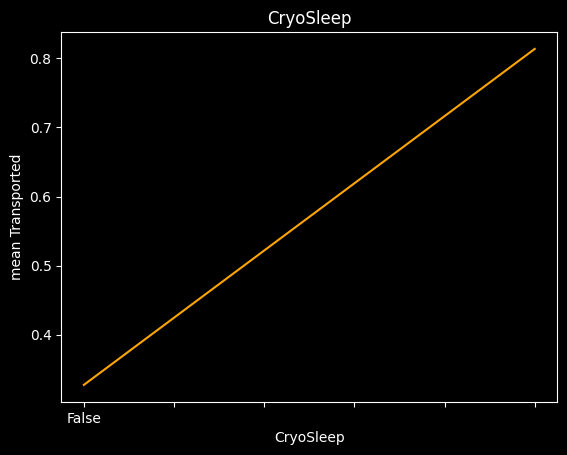

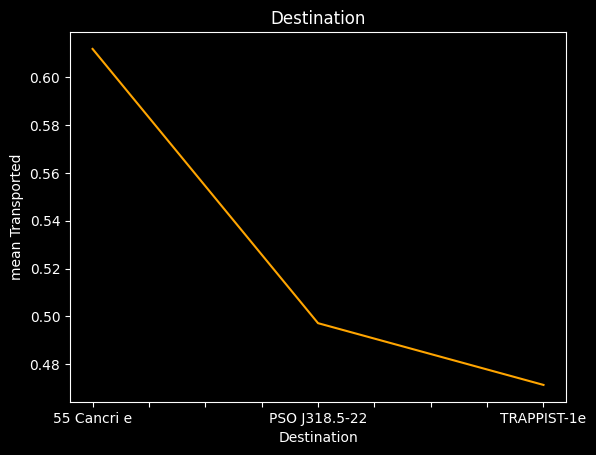

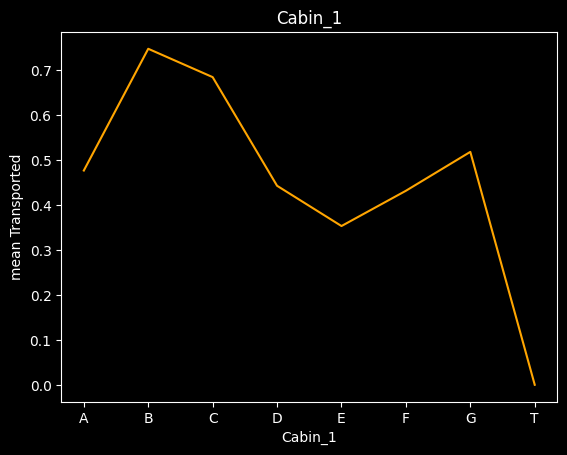

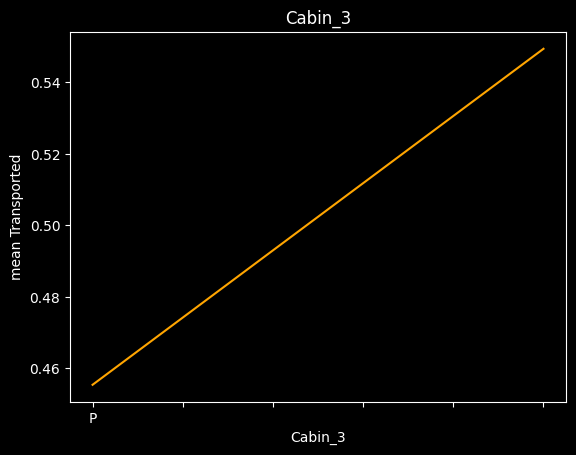

In [6]:
plt.style.use("dark_background")
for var in X_train.columns:
    
    fig = plt.figure()
    fig = y_train.groupby(X_train[var]).mean().plot(color = "orange")
    fig.set_title(var)
    fig.set_ylabel("mean Transported")
    plt.show()

In [7]:
y_train.groupby(X_train["Cabin_1"]).mean()

Cabin_1
A    0.477011
B    0.748077
C    0.684959
D    0.443077
E    0.353448
F    0.431953
G    0.518561
T    0.000000
Name: Transported, dtype: float64

In [8]:
ordered_labels = y_train.groupby(X_train["Cabin_1"]).mean().to_dict()
ordered_labels

{'A': 0.47701149425287354,
 'B': 0.7480769230769231,
 'C': 0.6849593495934959,
 'D': 0.4430769230769231,
 'E': 0.35344827586206895,
 'F': 0.4319526627218935,
 'G': 0.5185614849187935,
 'T': 0.0}

In [9]:
X_train["Cabin_1"] = X_train["Cabin_1"].map(ordered_labels)
X_test["Cabin_1"] = X_test["Cabin_1"].map(ordered_labels)

<Axes: xlabel='Cabin_1'>

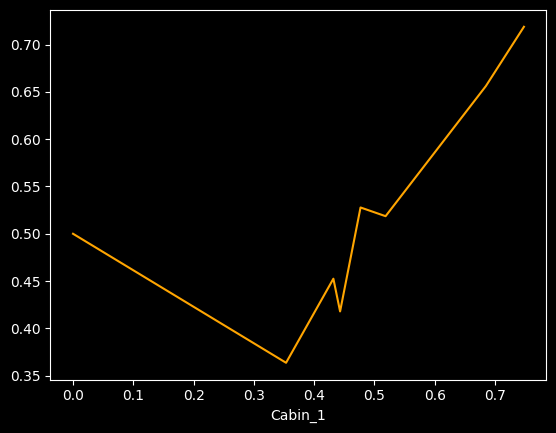

In [10]:
y_test.groupby(X_test["Cabin_1"]).mean().plot(color = "orange")

In [20]:
X= data.drop("Transported",axis=1)
y = data["Transported"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3,
    random_state=40,
)

X_train.shape, X_test.shape

((5676, 4), (2433, 4))

In [21]:
from feature_engine.encoding import MeanEncoder
mean_enc = MeanEncoder(variables =list(X_train.columns),smoothing="auto")
mean_enc.fit(X_train, y_train)
mean_enc.encoder_dict_

{'CryoSleep': {False: 0.33429380501123296, True: 0.8084085255129031},
 'Destination': {'55 Cancri e': 0.6095521056865021,
  'PSO J318.5-22': 0.517087851833042,
  'TRAPPIST-1e': 0.47187868847152953},
 'Cabin_1': {'A': 0.51200771595604,
  'B': 0.7323777190782162,
  'C': 0.6796187343093558,
  'D': 0.41186658270148147,
  'E': 0.35136022972245795,
  'F': 0.4457953570670494,
  'G': 0.5162349540538905,
  'T': 0.37264005394746247},
 'Cabin_3': {'P': 0.45449870960580174, 'S': 0.5551503968434769}}

In [22]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

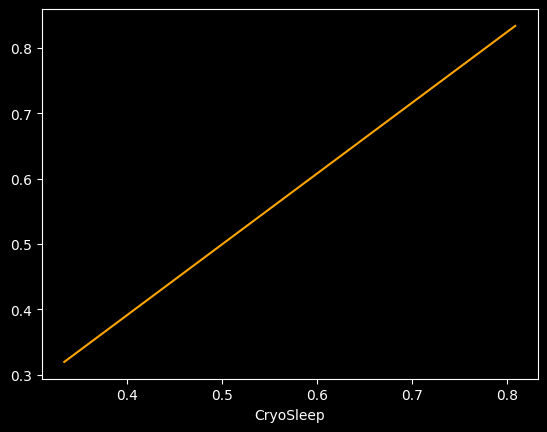

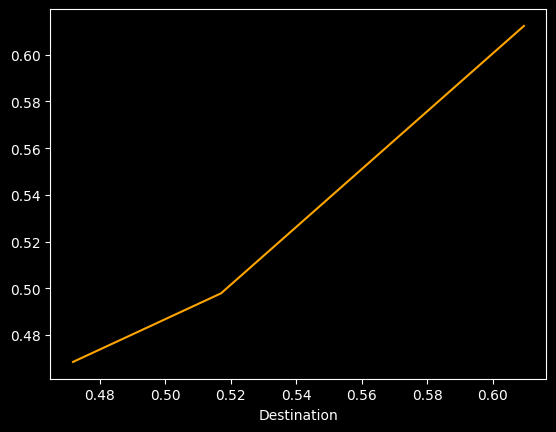

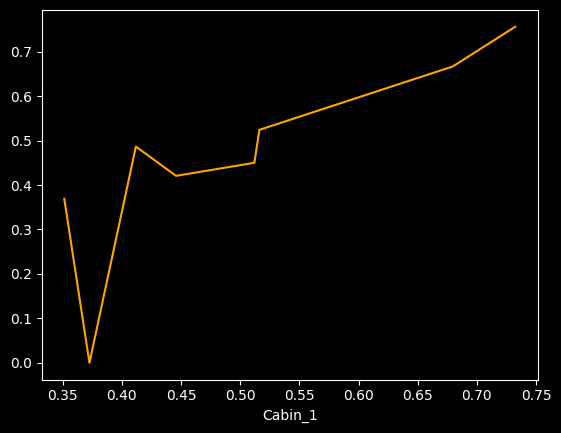

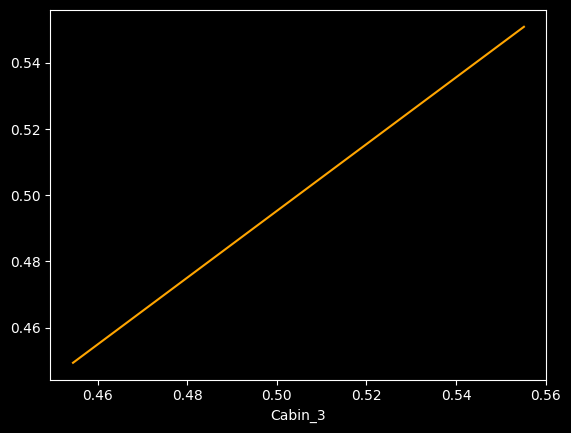

In [23]:
for col in X_test.columns:
    fig = plt.figure()
    fig = y_test.groupby(X_test[col]).mean().plot(color = "orange")
    plt.show()

In [24]:
X= data.drop("Transported",axis=1)
y = data["Transported"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3,
    random_state=40,
)

X_train.shape, X_test.shape

((5676, 4), (2433, 4))

In [42]:
from category_encoders.target_encoder import TargetEncoder

target_enc = TargetEncoder(cols=list(X_train.columns),
                           smoothing=10)

target_enc.fit(X_train,y_train)
target_enc.mapping

{'CryoSleep': CryoSleep
  1    0.334252
  2    0.808500
 -1    0.505285
 -2    0.505285
 dtype: float64,
 'Destination': Destination
  1    0.471870
  2    0.609635
  3    0.517110
 -1    0.505285
 -2    0.505285
 dtype: float64,
 'Cabin_1': Cabin_1
  1    0.445764
  2    0.516241
  3    0.351119
  4    0.679920
  5    0.732710
  6    0.411576
  7    0.512048
  8    0.478725
 -1    0.505285
 -2    0.505285
 dtype: float64,
 'Cabin_3': Cabin_3
  1    0.555168
  2    0.454481
 -1    0.505285
 -2    0.505285
 dtype: float64}

In [17]:
X_train=target_enc.transform(X_train)
X_test = target_enc.transform(X_test)

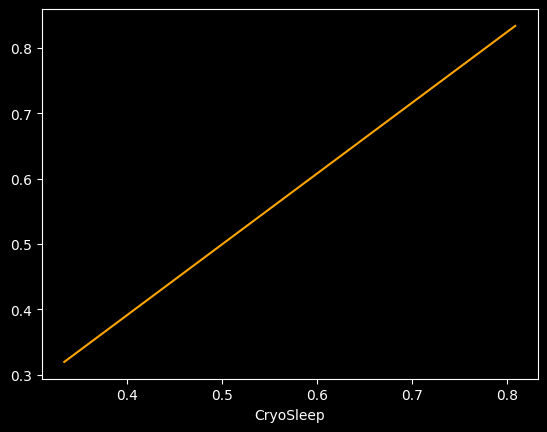

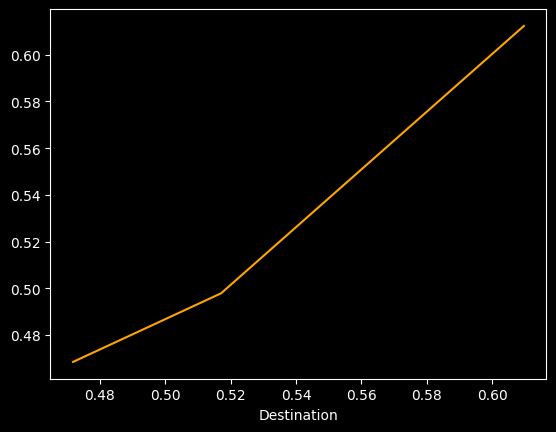

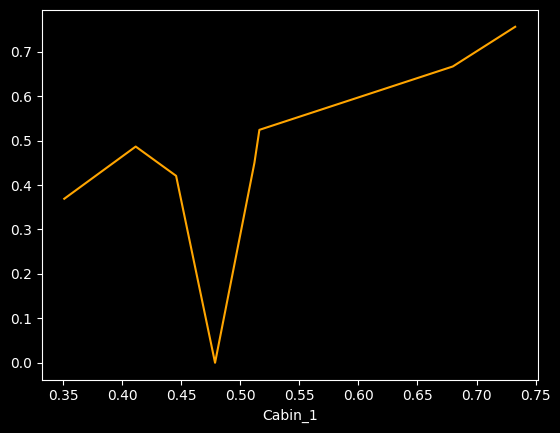

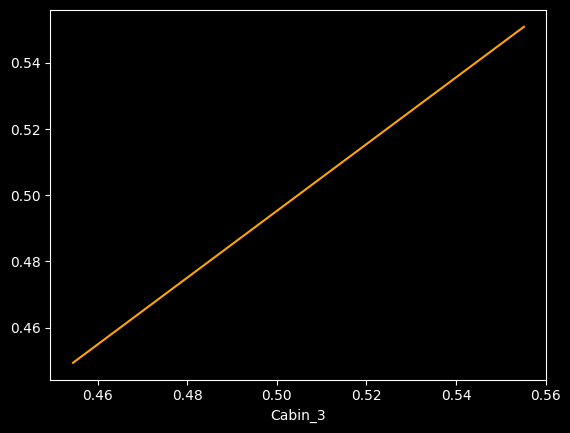

In [18]:
for col in X_test.columns:
    fig = plt.figure()
    fig = y_test.groupby(X_test[col]).mean().plot(color = "orange")
    plt.show()